In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# Instructions and Requirements:
## Instructions:
*   This week students will have assignments,as describe in the presentations.
*   Goal is to make students friendly with sklearn, so that they can perform there tasks.
*   OLS and Gradient descent has been done with scratch to show the students, also check the python coding skills of the student to design future tasks accordingly.
*   Please find the datasets in the google drive folders
## Requirements:
    *   Notebook Environment(Juopyter or Google Colab)
    *   Students are expected to have following datasets:
    *   brainhead.csv
    *   student.csv
    *   insurance.csv
    *   salary.csv
    *   bank.csv



# Week2 - Outline
*   Gentle Introduction to Regression task Linear Regression
    *   Cost/Objective Function
    *   Analitical vs Gradient Descent Approach
    *   Regularization methods 
    *   List item
*   Gentle Introduction to Classification task Logistic Regression
    *   Cost/Objective Function
    *   Implementation with SKlearn

*   Requirements
    *   Notebook Environment(Juopyter or Google Colab)
    *   Students are expected to have following datasets:
    *   brainhead.csv
    *   student.csv
    *   insurance.csv
    *   salary.csv
    *   bank.csv












# Regression
The task of the Regression Algorithm is to find the maping function to map the input variable(x) to teh continious output variable(y).
Regression analysis estimates the realtionship between a dependent variables and independent variables.
In the class we talked about two different approach


1.   Analytical Approach i.e Ordinary Least Square Methods
2.   Machine Learning Approach i.e Using Gradient Descent
In this exercise you are expected to implement both the methods from scratch.


# Ordinary Least Square Implementation from scratch
As per the Lectures, we can define the linear relationships between two variables as follows:
\begin{align}
        \mathbf{y} = \theta _o + \theta_1x
    \end{align}

Here:
$\theta _1$ is called scale factor or coefficient/slope and can be calculate as:
\begin{align}
        \mathbf{\theta _1} = \frac{\sum_{i=0}^n(x_i-\bar(x)))(y_i-\bar(y)) }{\sum_{i=1}^n(x_i-\bar(x))^2}.
    \end{align}
$\theta_o$ is an intercept and calculated as:
\begin{align}
        \mathbf{\theta_o} = \bar(y) - \theta_1 \bar(x)
    \end{align}
Implementation:
Start with Necessary Imports:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

## Step-1
(Datasets for this particular task is headbrain.csv)


*   Decision Task:
    *   Predicti the weight of brain from given datasets.
    *   Approach Simple Linear Regression with OLS.
*   Error Function and Evaluation Metrics:
    *   MSE.
    *  R squared.
*   Tasks to DO:
    *   Read the dataset using pandas.
    *   Display top 5 and bottom 5 rows of datasets.
    *   Information of the datasets
    *   We are doing mathematical operations we need to convert our feature and target variable into arrays.





In [4]:
# path_task1 = "/content/drive/MyDrive/Workshops(5CS037)/Workshop-6/Week-2/Datasets/headbrain.csv"
path_task1 = "./data/headbrain.csv"

In [5]:
data = pd.read_csv(path_task1)
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


### Find the mean
To find the values of $\theta_o $ and $\theta_1$ we first need to calculate the mean of X and Y

In [6]:
X = data['Head Size(cm^3)']
X

0      4512
1      3738
2      4261
3      3777
4      4177
       ... 
232    3214
233    3394
234    3233
235    3352
236    3391
Name: Head Size(cm^3), Length: 237, dtype: int64

In [7]:
type(X)

pandas.core.series.Series

In [8]:
X = data['Head Size(cm^3)'].values
X

array([4512, 3738, 4261, 3777, 4177, 3585, 3785, 3559, 3613, 3982, 3443,
       3993, 3640, 4208, 3832, 3876, 3497, 3466, 3095, 4424, 3878, 4046,
       3804, 3710, 4747, 4423, 4036, 4022, 3454, 4175, 3787, 3796, 4103,
       4161, 4158, 3814, 3527, 3748, 3334, 3492, 3962, 3505, 4315, 3804,
       3863, 4034, 4308, 3165, 3641, 3644, 3891, 3793, 4270, 4063, 4012,
       3458, 3890, 4166, 3935, 3669, 3866, 3393, 4442, 4253, 3727, 3329,
       3415, 3372, 4430, 4381, 4008, 3858, 4121, 4057, 3824, 3394, 3558,
       3362, 3930, 3835, 3830, 3856, 3249, 3577, 3933, 3850, 3309, 3406,
       3506, 3907, 4160, 3318, 3662, 3899, 3700, 3779, 3473, 3490, 3654,
       3478, 3495, 3834, 3876, 3661, 3618, 3648, 4032, 3399, 3916, 4430,
       3695, 3524, 3571, 3594, 3383, 3499, 3589, 3900, 4114, 3937, 3399,
       4200, 4488, 3614, 4051, 3782, 3391, 3124, 4053, 3582, 3666, 3532,
       4046, 3667, 2857, 3436, 3791, 3302, 3104, 3171, 3572, 3530, 3175,
       3438, 3903, 3899, 3401, 3267, 3451, 3090, 34

In [9]:
type(X)

numpy.ndarray

In [13]:
#Converting to Array
# Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values
# sanity check 
if X.shape == Y.shape:
    print(" Proceed Further")
else:
    print(" Shape doesnot match")

 Proceed Further


In [10]:
X.mean()

3633.9915611814345

In [14]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [15]:
mean_x, mean_y

(3633.9915611814345, 1282.873417721519)

### Calulate $\theta_0$ and $\theta_1$ :
using the given formula:
\begin{align}
        \mathbf{\theta _1} = \frac{\sum_{i=0}^n(x_i-\bar{x})(y_i-\bar{y}) }{\sum_{i=1}^n(x_i-\bar{x})^2}.
    \end{align}
$\theta_o$ is an intercept and calculated as:
\begin{align}
        \mathbf{\theta_o} = \bar{y} - \theta_1 \bar{x}
    \end{align}


In [16]:
list(range(n))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [17]:
# Total number of values
n = len(X)
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
theta_1 = numer / denom
theta_0 = mean_y - (theta_1 * mean_x)


In [18]:
# Print coefficients
print(theta_1, theta_0)


0.26342933948939945 325.57342104944223


### Lets visualize our model:

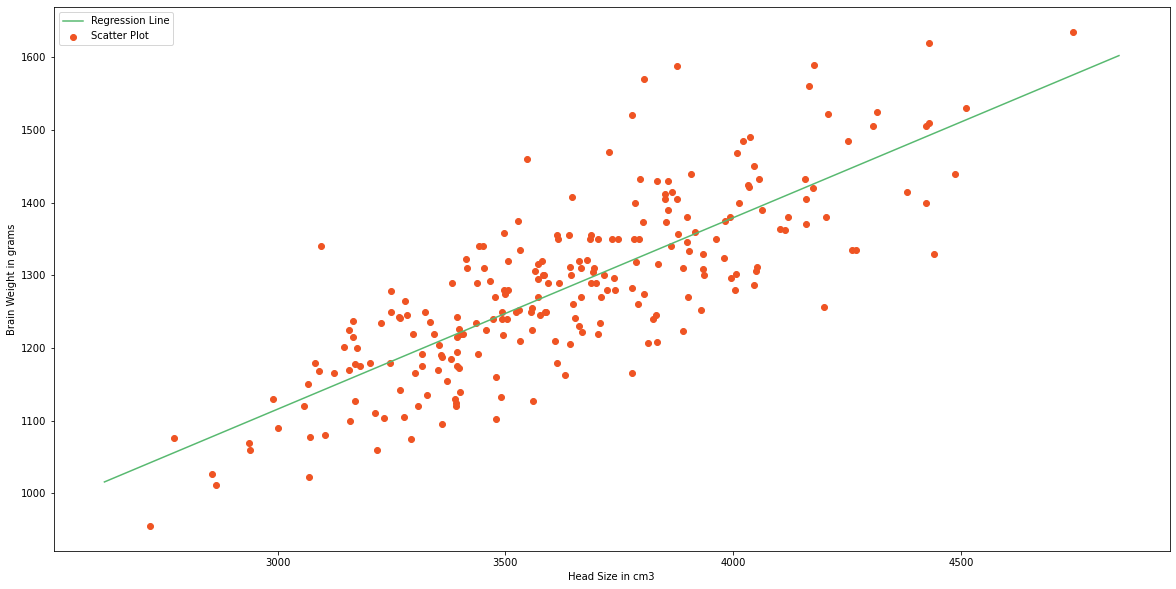

In [19]:
# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = theta_0 + theta_1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

### Evaluate our Model:
Lets see How Good is our model. As discussed in the lecture and Tutorial we will use Root Mean Squared Error and Coefficient of Determination( R2 )
Mathematically:
\begin{align}
        \mathbf{RMSE}  = \sqrt{\sum_{i=1}^n (1/m (\hat{y_i} - y_i)^2)}
    \end{align}

\begin{align}
        \mathbf{R^2}  = 1 - \frac{SSR}{SST}
    \end{align}

\begin{align}
         \mathbf{SST} = \sum_{i=1}^n (y_i - \bar{y})^2
    \end{align}
\begin{align}
         \mathbf{SSR} = \sum_{i=1}^n (y_i - \hat{y_i})^2
    \end{align}

In [12]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print(rmse)

72.1206213783709


In [13]:
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


# The sickit Learn Approach


Building Machine Learning models are very easy using scikit-learn. Let's see how we can build this Simple Linear Regression Model using scikit-learn.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((n, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Calculating RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957


# Multiple Linear Regression
### (Datasets for this task is student.csv)
Multiple Linear Regression is a type of Linear Regression when the input has multiple features ((variables)).Similar to Simple Linear Regression, we have input variable(X) and output variable(Y). But the input variable has nn features. Therefore, we can represent this linear model as follows;
\begin{align}
        \mathbf{Y} = \theta_o + \theta_1x_1 + \theta_2x_2 + .....+ \theta_nx_n
    \end{align}
Rewriting the equation:where $x_0 = 1$:
\begin{align}
        \mathbf{Y} = \theta_ox_0 + \theta_1x_1 + \theta_2x_2 + .....+ \theta_nx_n
    \end{align}
(Lets remove $\theta_0$ for easy calculation.)
Convert the equation to matrix:
\begin{align}
        \mathbf{Y} = \theta^T X
    \end{align}
where:
\begin{align}
        \mathbf{\theta} = [\theta_o, \theta_1, ...., \theta_n]^T
    \end{align}
\begin{align}
        \mathbf{X} = [x_o, x_1, ...., x_n]^T
    \end{align}

Our function can now be defined as:
\begin{align}
        \mathbf{h_\theta(.)}  = \theta^T x
    \end{align}
And the cost function will be:
\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2n} \sum_{i=1}^n(h_\theta(x_i) - y_i)^2
    \end{align}

## Steps:
### (Datasets for this particular task is student.csv)
*   Decision Task:
    *   Predict the score of writing based on  given datasets.
    *   Approach Multiple Linear Regression with Gradient Descent.
*   Error Function and Evaluation Metrics:
    *  MSE.
    *  R squared.
*   Tasks to DO:
    *   Read the dataset using pandas.
    *   Display top 5 and bottom 5 rows of datasets.
    *   Information of the datasets.
    *   Identify Feature and Target varaible.
    *   We are doing mathematical operations we need to convert our feature and target variable into arrays.





In [15]:
path_task2 = "./data/student.csv"
data = pd.read_csv(path_task2)
data.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [16]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

Lets Visualize the data:

C:\Users\user\AppData\Local\Temp/ipykernel_15780/2097655675.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


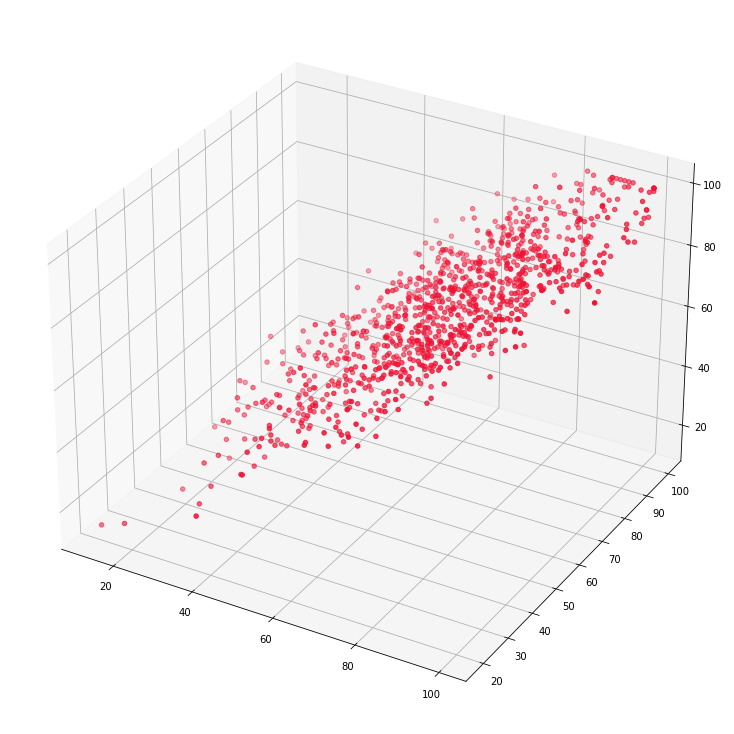

In [17]:
from mpl_toolkits.mplot3d import Axes3D
# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef1234')
plt.show()

# Initialize the following values:
(Remeber the rule for matrix multiplication)

1.   $x_0$ to one Hint you can use np.ones methods of numpy
2.   Initialize the values of B i.e we can start from 0
3.   Initialize the learning rate to be 0.0001



In [18]:
m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T
# Initial Coefficients/Weights
W = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001

# Cost Function
Calculate the cost fucntion:
From Lecture We know:
\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2n} \sum_{i=1}^n(h_\theta(x_i) - y_i)^2
    \end{align}
### Hints:
def cost_fucntion(parameters):
*   """Parameters"""
      *   Array of features and targets
      *   Array of weights or theta
*   Returns Cost value J



In [19]:
#Define the cost function
def cost_function(X, Y, W):
    """ Parameters:
    X: Feature Matrix
    Y: Target Matrix
    W: Weight Matrix
    """
     m = len(Y) # len of data in your datasets
   
    J = np.sum((X.dot(W) - Y) ** 2)/(2 * m)
    return J

In [20]:
X.shape

(1000, 3)

In [21]:
B = np.zeros(X.shape[1])
inital_cost = cost_function(X, Y, B)
print(inital_cost)

2470.11


### Gradient:
Function to estimate: 
  *   $h_\theta(x) = \theta^T x$

*   Loss function to minimize: 
      *   $(h_\theta(x) - y)^2$
*   Gradient: Decsent update:
      *   $\theta_(j+1)   = \theta_j - LR(D_\theta)$
*   $D(\theta) = 1/m * (\theta^T * X)$


In [24]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = (X.T.dot(loss) ) / (m)
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [25]:
# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

# New Values of
print(newB)

# Final Cost of new B
print(cost_history[-1])

[-0.47889172  0.09137252  0.90144884]
10.475123473539167


In [26]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

4.5771439727277885
0.9097223273061554


# SK LEARN
Simple Implementation of Ridge and Lasso Regularization

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X and Y Values
X = np.array([math, read]).T
Y = np.array(write)

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print(rmse)
print(r2)

4.572887051836439
0.9098901726717316


In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# X and Y Values
X = np.array([math, read]).T
Y = np.array(write)

# Model Intialization
reg = Lasso(alpha = 0.25)
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print(rmse)
print(r2)

4.572920311613435
0.9098888618833271
